# The Impact of Coronavirus
- Team Wild Card: Shambhavi Danayak, William Kopec, Chinmay Wadnerkar, Ian Lulu

### Important Links for the project
- Github Repository:https://github.com/uic-cs418/cs418-spring22-the-wild-card
- Data sources: <br>
1) https://covid19.who.int/WHO-COVID-19-global-data.csv <br>
2) https://covid19.who.int/who-data/vaccination-data.csv

### Project Overview
The Impact of Vaccines on Covid-19 Death Rates<br>
Covid-19 Pandemic affected the entire globe for more than two years hence the need to understand the pandemic becomes important.The idea of this project is to analyze Covid-19 cases report database and vaccine database created by WORLD HEALTH ORGANIZATION (WHO) with the help of some Machine Learning Techniques and visualizaztions to get useful results. <br>
Analysis of the dataset could help research the impact of Covid-19 virus to answer a lot of questions such as:
- What was the impact of vaccination in the containment of the virus?
- Should anti-vaccination population consider changing their stance to get vaccinated?
- What is the death rate caused due to Covid-19 virus across various countries? Which country had the - highest impact and which had the lowest?
- How to better assist NGOs, healthcare companies and disease control institutions in combating COVID-19 and preventing future outbreaks?

### Problem Statement
How has Vaccination impacted the Coronavirus cases?

#### Importing required libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#### Reading and merging the Datasets, source: WHO 
-  We changed the WHO_region and Country in main to match the WHO_REGION and COUNTRY in vaccine.<br>
- We will analyze/visualize data for 237 countries featured in the main dataset.

In [3]:
main = pd.read_csv("WHO-COVID-19-global-data.csv")
main.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/2020,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/2020,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/2020,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/2020,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
vaccine = pd.read_csv("vaccination-data.csv")
vaccine.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2/27/2022,5535254,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,Albania,ALB,EURO,REPORTING,2/20/2022,2707658,1284034.0,94.100,45.118,1192155.0,41.889,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",1/13/2021,5.0
2,Algeria,DZA,AFRO,REPORTING,2/20/2022,13631683,7456361.0,31.086,17.004,6076272.0,13.857,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",1/30/2021,4.0
3,American Samoa,ASM,WPRO,REPORTING,2/16/2022,85050,42212.0,154.084,76.475,37805.0,68.491,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",12/21/2020,3.0
4,Andorra,AND,EURO,REPORTING,2/13/2022,142420,57797.0,184.300,75.872,53250.0,69.903,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",1/20/2021,3.0


In [5]:
main = main.rename(columns={"WHO_region": "WHO_REGION", "Country": "COUNTRY"})
main = main.merge(vaccine, how='outer', on=['WHO_REGION', 'COUNTRY'])
main = main.dropna(subset=['Date_reported'])
main.head()

,Date_reported,Country_code,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,ISO3,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,1/3/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,1/4/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
2,1/5/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
3,1/6/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
4,1/7/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0


In [6]:
main.loc[:, "COUNTRY"].value_counts()[0:5] 
##main.head()

Afghanistan        781
Paraguay           781
Nigeria            781
Niue               781
North Macedonia    781
Name: COUNTRY, dtype: int64

#### EXPLORATORY DATA ANALYSIS
- Understanding the data
- Data cleaning as required
- Understanding relationships between variables, finding data discripencies etc.
- Finally maximizing or minimizing of the dataset to create useful results (This is processes is continued as required in the project)

In [17]:
## Dropping inessential columns
if 'Country_code' in main.columns and 'ISO3' in main.columns and 'DATA_SOURCE' in main.columns:
    main = main.drop(columns=['Country_code', 'ISO3', 'DATA_SOURCE'])
pd.set_option('display.max_rows', None) ##to see at first 100 rows and understand any trends in the dataset
main.head()

,Date_reported,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,1/3/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,1/4/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
2,1/5/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
3,1/6/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
4,1/7/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0


In [8]:
main.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,1.850970e+05,1.850970e+05,185097.000000,185097.000000,1.749440e+05,1.726010e+05,174944.000000,172601.000000,1.726010e+05,172601.000000,172601.000000
mean,2.287653e+03,5.027141e+05,31.758094,10487.416474,4.723417e+07,2.218065e+07,121.994857,55.293367,1.957116e+07,49.659900,3.936652
std,1.571867e+04,2.774388e+06,166.263364,49849.100062,2.427691e+08,1.101057e+08,71.924269,27.120417,1.001905e+08,26.368103,1.908682
min,-3.295200e+04,0.000000e+00,-4214.000000,0.000000,7.400000e+01,3.700000e+01,0.093000,0.079000,3.700000e+01,0.074000,1.000000
25%,0.000000e+00,1.290000e+02,0.000000,1.000000,3.584212e+05,1.830130e+05,62.841000,32.785000,1.491670e+05,28.876000,3.000000
50%,2.100000e+01,8.577000e+03,0.000000,122.000000,2.737200e+06,1.474560e+06,126.863500,62.901000,1.162835e+06,53.568000,4.000000
75%,4.910000e+02,1.330880e+05,6.000000,2302.000000,1.653898e+07,7.762333e+06,176.373250,76.813000,6.791628e+06,71.828000,5.000000
max,1.327952e+06,7.772948e+07,8786.000000,926287.000000,3.094069e+09,1.276287e+09,334.116000,123.787000,1.235535e+09,121.219000,11.000000


In [9]:
##main.info
main.isnull().sum()

Date_reported                               0
COUNTRY                                     0
WHO_REGION                                  0
New_cases                                   0
Cumulative_cases                            0
New_deaths                                  0
Cumulative_deaths                           0
DATE_UPDATED                            10153
TOTAL_VACCINATIONS                      10153
PERSONS_VACCINATED_1PLUS_DOSE           12496
TOTAL_VACCINATIONS_PER100               10153
PERSONS_VACCINATED_1PLUS_DOSE_PER100    12496
PERSONS_FULLY_VACCINATED                12496
PERSONS_FULLY_VACCINATED_PER100         12496
VACCINES_USED                           12496
FIRST_VACCINE_DATE                      24211
NUMBER_VACCINES_TYPES_USED              12496
dtype: int64

<AxesSubplot:>

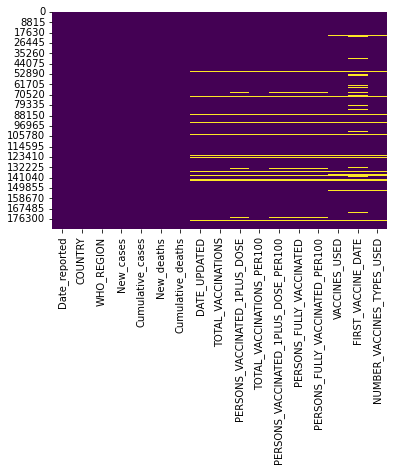

In [10]:
## Now we check for mising values 
main.isnull().sum()
sns.heatmap(main.isnull(),cbar=False,cmap='viridis')

##### INFERENCE: As we can see from the above heatmap the dataset does contain some missing/null values

In [15]:
##This is an example code which drops Nan values 
## When you scrollthrough the output list you see all are false meaning no nan values found)
##Such meaningful data cleaning techniques were done as required
main["DATE_UPDATED"].unique()
main= main.dropna(subset=["DATE_UPDATED"])
#main["DATE_UPDATED"].isnull()

In [16]:
main.describe()
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174944 entries, 0 to 185096
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Date_reported                         174944 non-null  object 
 1   COUNTRY                               174944 non-null  object 
 2   WHO_REGION                            174944 non-null  object 
 3   New_cases                             174944 non-null  float64
 4   Cumulative_cases                      174944 non-null  float64
 5   New_deaths                            174944 non-null  float64
 6   Cumulative_deaths                     174944 non-null  float64
 7   DATE_UPDATED                          174944 non-null  object 
 8   TOTAL_VACCINATIONS                    174944 non-null  float64
 9   PERSONS_VACCINATED_1PLUS_DOSE         172601 non-null  float64
 10  TOTAL_VACCINATIONS_PER100             174944 non-null  float64
 11  

### EXPLORATORY DATA ANALYSIS RESULTS
- **Understanding the data:** <br>
1) At first glance we can see our dataet has columns featuring reported cases,Date repoprted, cumulative deaths, vaccination dates etc. Then a simple heatmap was made to get a visual idea of how many missing/nan values are present in the data. <br>
2) Using pandas library features such as .dropna(), .isnull() etc. were used to drop/replace missing/nan values <br>
3) There are a total of 174944 entries in the dataset and a total of 17 columns. Data is of two types, float(64) or object(6).<br>
4) The dataset uses 24.0+ MB memory<br>
- **Data Granuality:** Covid cases are reported on a daily basis starting 1/3/2020 to 2/21/2022. 
- **Data Temporality:**  Since data is reported on a daily basis across the globe, the data is Spatiotemporal.
- **Relationships/descripencies in the dataset:** <br>
1) Covid cases are reported on a daily basis while vaccinations dates are random. This dicrepency made it difficult to correlate between case, death dates and vaccination dates.<br>
2) .describe() points to the fact that there are few cases where new cases have negative value, which is not possible. Hence created a discrepency in our dataset

### Visualizations: <br>
In order for us to understand whether or not the vaccines are completely effective in preventing the spread of Covid-19, it is important to understand the scale/severity of the pandemic and how quickly Covid is spreading. To demonstrate, we chose our home country (USA) to show how quickly the cumulative cases are growing.

Text(0, 0.5, 'Cumulative Cases (In 10 Millions)')

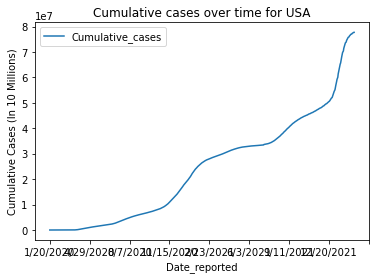

In [13]:
# Considering only United States of America
import datetime
from datetime import date

df= main[["COUNTRY","Date_reported", "Cumulative_cases"]]

dfUSA= df[df['COUNTRY']== 'United States of America']
usa=dfUSA[dfUSA.Cumulative_cases!=0].reset_index()
#usa.head()
#usa.tail() #763

ax = usa.plot.line(x='Date_reported', y='Cumulative_cases', title="Cumulative cases over time for USA")
ax.set_ylabel("Cumulative Cases (In 10 Millions)")

Next, we analyzed the countries which did have vaccinations and countries which didn't have vaccinations and compared 2 countries new cases (of similar population) after the first vaccination date of the vaccinated country. This would give us a better idea of understanding if the covid vaccines had an immediate response in new cases or not. We found that Russia (Unvaccinated) and Japan (Vaccinated as of ...) had similar populations so we decided to compare:

DatetimeIndex(['2021-02-17'], dtype='datetime64[ns]', freq=None)


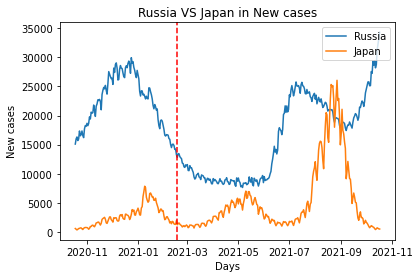

In [14]:
import datetime

first_vaccine_dates = main[['COUNTRY', "FIRST_VACCINE_DATE"]]
first_vaccine_dates = first_vaccine_dates.drop_duplicates()
first_vaccine_dates['FIRST_VACCINE_DATE'] = pd.to_datetime(first_vaccine_dates['FIRST_VACCINE_DATE'])
first_vaccine_dates = first_vaccine_dates.sort_values(by='FIRST_VACCINE_DATE')

vaxxedCountries = first_vaccine_dates[np.isnat(first_vaccine_dates.FIRST_VACCINE_DATE) == False]
unvaxxedCountries = first_vaccine_dates[np.isnat(first_vaccine_dates.FIRST_VACCINE_DATE) == True]

#1 vaccinated Country (Japan) and 1 unvaccinated Country (Russia)
subData3 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'Russian Federation'])
subData4 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'Japan'])

first_vax_date = pd.to_datetime(first_vaccine_dates['FIRST_VACCINE_DATE'].loc[first_vaccine_dates['COUNTRY'] == 'Japan'].values)

subData3['Date_reported'] = pd.to_datetime(subData3['Date_reported'])
subData4['Date_reported'] = pd.to_datetime(subData4['Date_reported'])

start_date = '2020-10-17'
end_date = '2021-10-17'

mask3 = (subData3['Date_reported'] > start_date) & (subData3['Date_reported'] <= end_date)
mask4 = (subData4['Date_reported'] > start_date) & (subData4['Date_reported'] <= end_date)

subData3 = subData3[mask3]
subData4 = subData4[mask4]

fig = plt.figure()

for frame in [subData3, subData4]:
    plt.plot(frame['Date_reported'], frame['New_cases'])
#Get the first vaccination date for USA
print(first_vax_date)

#plot the first vaccination date on the graph
plt.axvline(first_vax_date, color="red", linestyle="--")
plt.legend(["Russia", "Japan"], loc ="upper right")
plt.title("Russia VS Japan in New cases")
plt.ylabel("New cases")
plt.xlabel("Days")
plt.show()

Next, we wanted to compare the cumulative cases and deaths of all WHO Regions specified in the data.

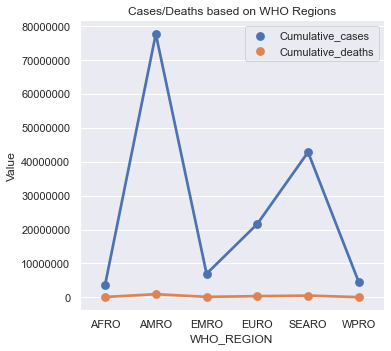

In [18]:
import seaborn as sns
sns.set_theme()


region_and_cases = main[['WHO_REGION', 'Cumulative_cases', 'Cumulative_deaths']]
region_and_cases = region_and_cases.groupby(['WHO_REGION']).max().reset_index()

df = pd.melt(region_and_cases, id_vars="WHO_REGION", var_name = 'Cases_and_Deaths', value_name = 'Value')

sns.catplot(data = df, x = "WHO_REGION", y = 'Value', hue = 'Cases_and_Deaths', ci = 'sd', kind = 'point', legend = False)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')
plt.title("Cases/Deaths based on WHO Regions")
plt.legend()
plt.show()

Lastly, we created a bar graph to see how each region is doing in terms of number of vaccinations per WHO Region. This graph will be useful to compare with the last graph to see if the most vaccinated countries have lower cumulative cases and deaths.

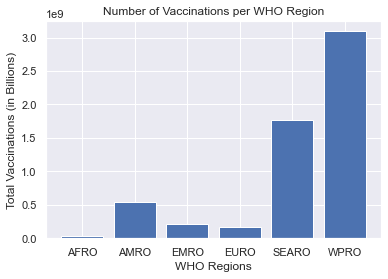

In [19]:
region_vax = main[['WHO_REGION', 'TOTAL_VACCINATIONS']]
region_vax = region_vax.groupby(['WHO_REGION']).max().reset_index()
#print(region_vax)

plt.bar(region_vax['WHO_REGION'], region_vax['TOTAL_VACCINATIONS'])
plt.title('Number of Vaccinations per WHO Region')
plt.xlabel('WHO Regions')
plt.ylabel('Total Vaccinations (in Billions)')
plt.show()